In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
adv_df = pd.read_excel("/content/drive/My Drive/Advertising.xlsx")
adv_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Text(0.5, 0, 'Sales')

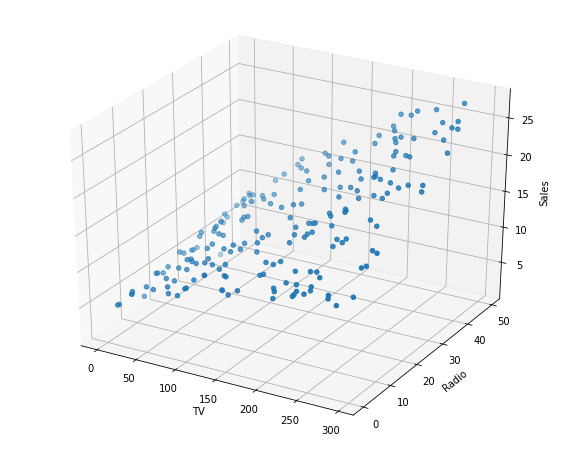

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(adv_df['TV'], adv_df['Radio'], adv_df['Sales'])
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

In [ ]:
#find a model
reg = lm.LinearRegression()
reg.fit(adv_df[['TV', 'Newspaper', 'Radio']], adv_df['Sales'])
reg.intercept_, reg.coef_

(2.938889369459412, array([ 0.04576465, -0.00103749,  0.18853002]))

In [ ]:
#split data
from sklearn.model_selection import train_test_split
train, test = train_test_split(adv_df, test_size = 0.2)

In [ ]:
train

,TV,Radio,Newspaper,Sales
33,265.6,20.0,0.3,17.4
102,280.2,10.1,21.4,14.8
193,166.8,42.0,3.6,19.6
86,76.3,27.5,16.0,12.0
6,57.5,32.8,23.5,11.8
...,...,...,...,...
168,215.4,23.6,57.6,17.1
146,240.1,7.3,8.7,13.2
140,73.4,17.0,12.9,10.9
80,76.4,26.7,22.3,11.8


In [ ]:
test

,TV,Radio,Newspaper,Sales
199,232.1,8.6,8.7,13.4
169,284.3,10.6,6.4,15.0
27,240.1,16.7,22.9,15.9
138,43.0,25.9,20.5,9.6
181,218.5,5.4,27.4,12.2
98,289.7,42.3,51.2,25.4
114,78.2,46.8,34.5,14.6
101,296.4,36.3,100.9,23.8
69,216.8,43.9,27.2,22.3
53,182.6,46.2,58.7,21.2


In [ ]:
reg.fit(train[['TV', 'Newspaper', 'Radio']], train['Sales'])
reg.intercept_, reg.coef_

(3.301210748785394, array([ 0.04525829, -0.00546539,  0.18131758]))

In [ ]:
y_hat = reg.predict(test[['TV', 'Newspaper', 'Radio']])

In [ ]:
y_hat.shape

(40,)

In [ ]:
import sklearn.metrics as mt
print(mt.mean_squared_error(test['Sales'], y_hat))


2.662688101511627


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


Text(0.5, 0, 'Sales')

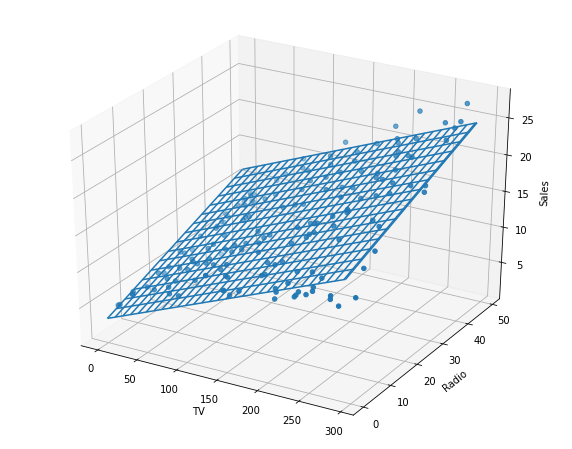

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
X = train[['TV', 'Radio']].values
y = train['Sales'].values
reg.fit(X, y)
x1 = list(range(int(np.min(X[:,0])), int(np.max(X[:,0]))))
x2 = list(range(int(np.min(X[:,1])), int(np.max(X[:,1]))))
x12 = list(([x,y] for x in x1 for y in x2))
ys = [reg.predict([x]) for x in x12]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
XX1, XX2 = np.meshgrid(x1, x2)
XX1 = XX1.T
XX2 = XX2.T
ys_a = np.array(ys)
ys_a = ys_a.T.reshape(XX1.shape)
ax.plot_wireframe(XX1, XX2, ys_a, rstride=10, cstride=3)
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(3)
knn_reg.fit(train[['TV', 'Newspaper', 'Radio']], train['Sales'])

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_hat = knn_reg.predict(test[['TV', 'Newspaper', 'Radio']])
print(mt.mean_squared_error(test['Sales'], y_hat))

1.6460833333333327


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


Text(0.5, 0, 'Sales')

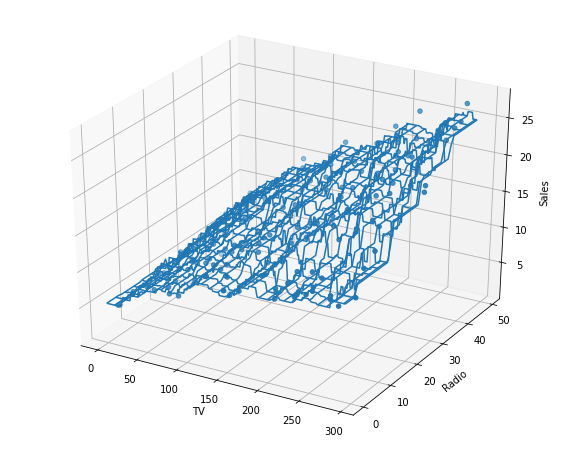

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
X = train[['TV', 'Radio']].values
y = train['Sales'].values
knn_reg.fit(X, y)
x1 = list(range(int(np.min(X[:,0])), int(np.max(X[:,0]))))
x2 = list(range(int(np.min(X[:,1])), int(np.max(X[:,1]))))
x12 = list(([x,y] for x in x1 for y in x2))
ys = [knn_reg.predict([x]) for x in x12]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
XX1, XX2 = np.meshgrid(x1, x2)
XX1 = XX1.T
XX2 = XX2.T
ys_a = np.array(ys)
ys_a = ys_a.T.reshape(XX1.shape)
ax.plot_wireframe(XX1, XX2, ys_a, rstride=10, cstride=3)
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=20)
kf.get_n_splits(adv_df)


20

In [ ]:
#find the data instances in training and testing for each split
k = 0
for train_index, test_index in kf.split(adv_df):
  print(f'Split {k} training: {train_index}')
  print(f'Split {k} testing: {test_index}')
  k = k + 1
  print()


Split 0 training: [ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199]
Split 0 testing: [0 1 2 3 4 5 6 7 8 9]

Split 1 training: [  0   1   2   3   4   5   6   7   8   9  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  

In [ ]:
#collect performance data for each split
k = 0
mse_knn = []
mse_linear = []
for train_index, test_index in kf.split(adv_df):
  train = adv_df.iloc[train_index]
  test = adv_df.iloc[test_index]

  # working with linear regression
  reg = lm.LinearRegression()
  reg.fit(train[['TV', 'Newspaper', 'Radio']], train['Sales'])
  y_hat = reg.predict(test[['TV', 'Newspaper', 'Radio']])
  mse_linear = mse_linear + [mt.mean_squared_error(test['Sales'], y_hat)]
  # working with k-nearest neighbor
  knn_reg = KNeighborsRegressor(3)
  knn_reg.fit(train[['TV', 'Newspaper', 'Radio']], train['Sales'])
  y_hat = knn_reg.predict(test[['TV', 'Newspaper', 'Radio']])
  mse_knn = mse_knn + [mt.mean_squared_error(test['Sales'], y_hat)]


In [ ]:
mse_knn

[1.054555555555556,
 0.6349999999999996,
 2.1702222222222227,
 3.801222222222222,
 5.067111111111108,
 3.0806666666666698,
 1.849222222222222,
 0.743666666666666,
 1.5120000000000011,
 0.7767777777777778,
 1.3399999999999999,
 1.2337777777777785,
 2.301333333333333,
 3.9049999999999985,
 1.4239999999999986,
 1.3895555555555552,
 1.3475555555555538,
 2.3934444444444454,
 0.652222222222222,
 0.8205555555555557]

In [ ]:
mse_linear

[5.710842860068978,
 1.1966136962032266,
 2.84423369649548,
 3.446711501046071,
 1.2080947090119214,
 3.006314904733304,
 1.6992627390262265,
 4.0201916856688085,
 1.0499553530850174,
 1.5173198340118417,
 2.2782137130072124,
 1.1629903826812302,
 3.8847932756853774,
 12.367678563522656,
 1.964241269533647,
 2.302940027180576,
 2.5930463856124226,
 3.1498610935379125,
 2.534470032656354,
 2.3302153521717104]

In [ ]:
print("Linear Average MSE:", np.mean(mse_linear))
print("KNN Average MSE:", np.mean(mse_knn))


Linear Average MSE: 3.013399553746999
KNN Average MSE: 1.8748944444444444


In [ ]:
#test the statistical significance of the difference
from scipy import stats
stats.ttest_ind(mse_linear,mse_knn)


Ttest_indResult(statistic=1.833785076884894, pvalue=0.0745267599103728)